In [13]:
import numpy as np
from skimage.io import imread
from scipy import signal
import matplotlib.pylab as pylab

(224, 225)


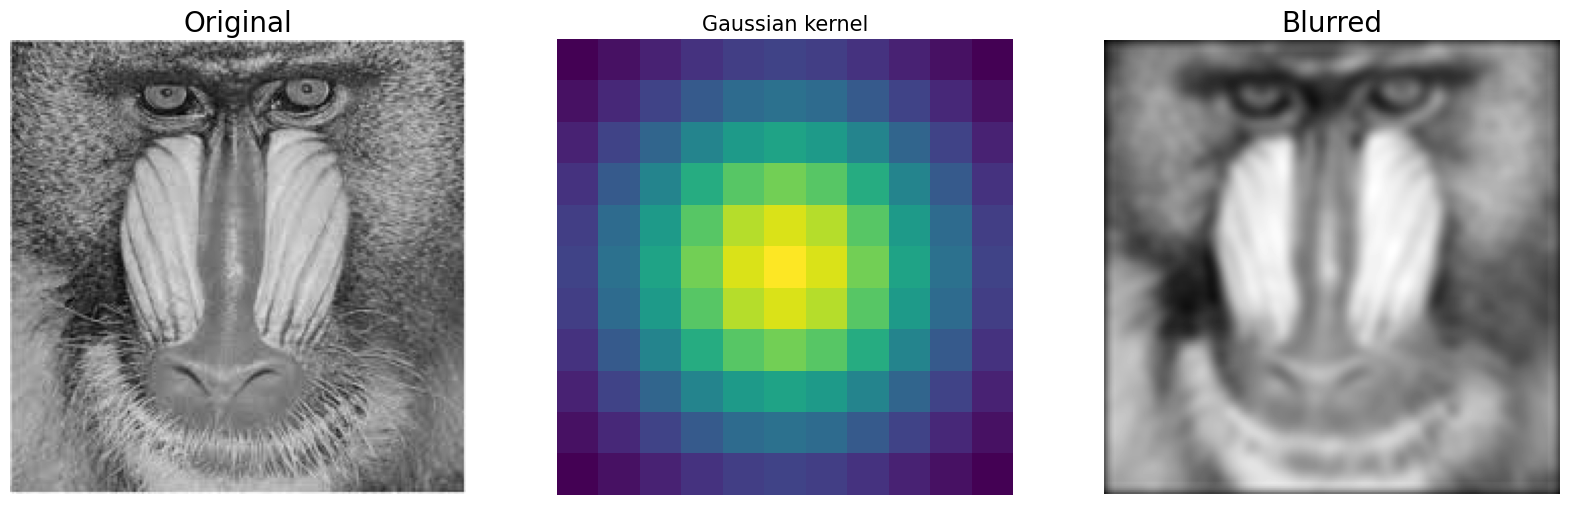

In [15]:
# Đọc hình ảnh và chuyển đổi sang thang độ xám bằng cách lấy trung bình các kênh màu
im = np.mean(imread('images/mandrill.jpg'), axis=2)
print(im.shape)
# (224, 225)

# Tạo kernel Gaussian
gauss_kernel = np.outer(signal.windows.gaussian(11, 3), signal.windows.gaussian(11, 3))

# Làm mờ hình ảnh bằng cách sử dụng fftconvolve
im_blurred = signal.fftconvolve(im, gauss_kernel, mode='same')

# Tạo các subplot để hiển thị hình ảnh gốc, kernel Gaussian và hình ảnh đã làm mờ
fig, (ax_original, ax_kernel, ax_blurred) = pylab.subplots(1, 3, figsize=(20, 8))

# Hiển thị hình ảnh gốc
ax_original.imshow(im, cmap='gray')
ax_original.set_title('Original', size=20)
ax_original.set_axis_off()

# Hiển thị kernel Gaussian
ax_kernel.imshow(gauss_kernel)
ax_kernel.set_title('Gaussian kernel', size=15)
ax_kernel.set_axis_off()

# Hiển thị hình ảnh đã làm mờ
ax_blurred.imshow(im_blurred, cmap='gray')
ax_blurred.set_title('Blurred', size=20)
ax_blurred.set_axis_off()

# Hiển thị toàn bộ hình ảnh
pylab.show()

C:\Users\vuklu\AppData\Local\Temp\ipykernel_12624\502143135.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(1,2,1), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int),
C:\Users\vuklu\AppData\Local\Temp\ipykernel_12624\502143135.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.subplot(1,2,2), pylab.imshow( (20*np.log10( 0.1 + F2)).astype(int),


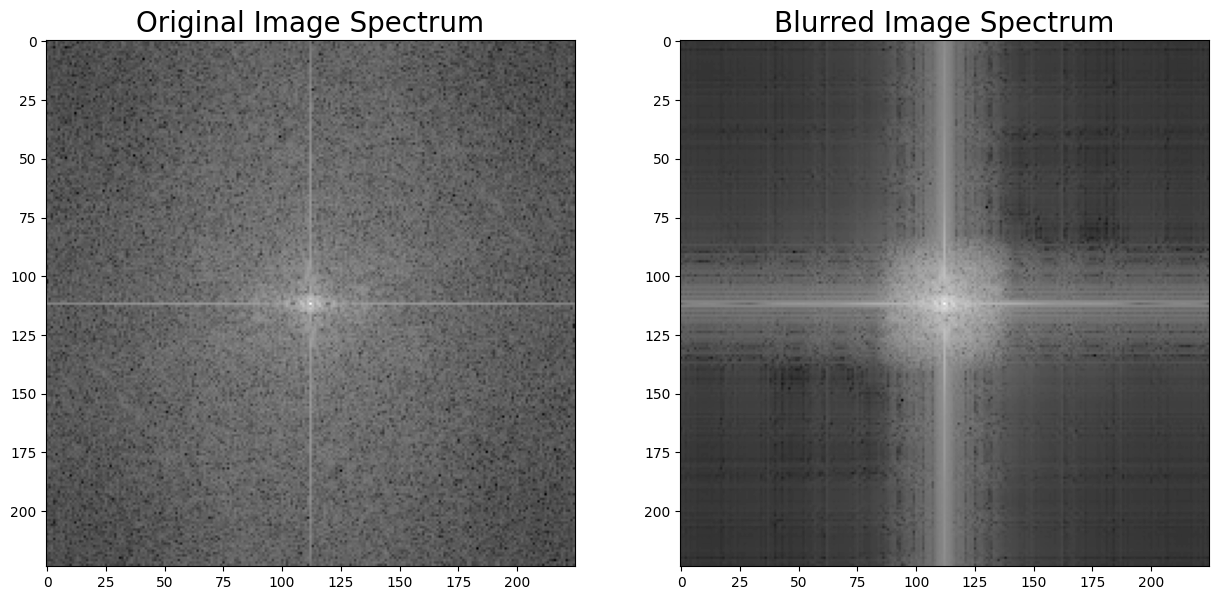

In [ ]:
import scipy.fftpack as fftpack

# Tính toán FFT 2D của hình ảnh gốc và chuyển đổi nó sang kiểu float
F1 = fftpack.fft2(im.astype(float))

# Dịch chuyển zero-frequency component đến trung tâm của phổ
F2 = fftpack.fftshift(F1)

# Tạo một cửa sổ hiển thị với kích thước 15x8 inch
pylab.figure(figsize=(15,8))

# Hiển thị phổ của hình ảnh gốc
pylab.subplot(1, 2, 1)
pylab.imshow((20 * np.log10(0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.title('Original Image Spectrum', size=20)

# Tính toán FFT 2D của hình ảnh đã làm mờ và chuyển đổi nó sang kiểu float
F1 = fftpack.fft2(im_blurred.astype(float))

# Dịch chuyển zero-frequency component đến trung tâm của phổ
F2 = fftpack.fftshift(F1)

# Hiển thị phổ của hình ảnh đã làm mờ
pylab.subplot(1, 2, 2)
pylab.imshow((20 * np.log10(0.1 + F2)).astype(int), cmap=pylab.cm.gray)
pylab.title('Blurred Image Spectrum', size=20)

# Hiển thị toàn bộ hình ảnh
pylab.show()

(224, 225)


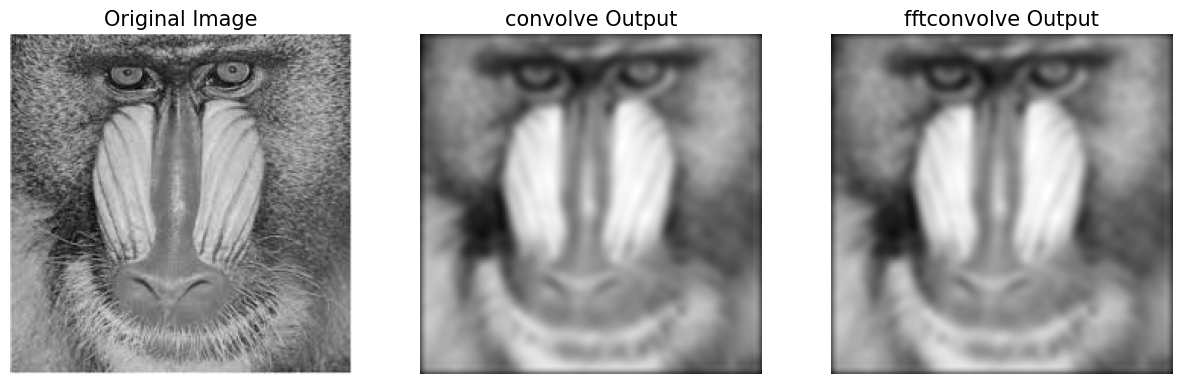

In [18]:
# Đọc hình ảnh và chuyển đổi sang thang độ xám bằng cách lấy trung bình các kênh màu
im = np.mean(imread('images/mandrill.jpg'), axis=2)
print(im.shape)
# (224, 225)

# Tạo kernel Gaussian
gauss_kernel = np.outer(signal.windows.gaussian(11, 3), signal.windows.gaussian(11, 3))

# Làm mờ hình ảnh bằng cách sử dụng hàm convolve
im_blurred1 = signal.convolve(im, gauss_kernel, mode="same")

# Làm mờ hình ảnh bằng cách sử dụng hàm fftconvolve
im_blurred2 = signal.fftconvolve(im, gauss_kernel, mode='same')

# Định nghĩa hàm wrapper để bọc hàm convolve và fftconvolve cho việc đo thời gian
def wrapper_convolve(func):
    def wrapped_convolve():
        return func(im, gauss_kernel, mode="same")
    return wrapped_convolve

# Bọc hàm convolve và fftconvolve
wrapped_convolve = wrapper_convolve(signal.convolve)
wrapped_fftconvolve = wrapper_convolve(signal.fftconvolve)

# Đo thời gian thực thi của hàm convolve
times1 = timeit.repeat(wrapped_convolve, number=1, repeat=100)

# Đo thời gian thực thi của hàm fftconvolve
times2 = timeit.repeat(wrapped_fftconvolve, number=1, repeat=100)

# Tạo một cửa sổ hiển thị với kích thước 15x5 inch
pylab.figure(figsize=(15,5))

# Chuyển đổi chế độ hiển thị sang thang độ xám
pylab.gray()

# Hiển thị hình ảnh gốc
pylab.subplot(131)
pylab.imshow(im)
pylab.title('Original Image', size=15)
pylab.axis('off')

# Hiển thị hình ảnh đã làm mờ bằng hàm convolve
pylab.subplot(132)
pylab.imshow(im_blurred1)
pylab.title('convolve Output', size=15)
pylab.axis('off')

# Hiển thị hình ảnh đã làm mờ bằng hàm fftconvolve
pylab.subplot(133)
pylab.imshow(im_blurred2)
pylab.title('fftconvolve Output', size=15)
pylab.axis('off')

# Hiển thị toàn bộ hình ảnh
pylab.show()

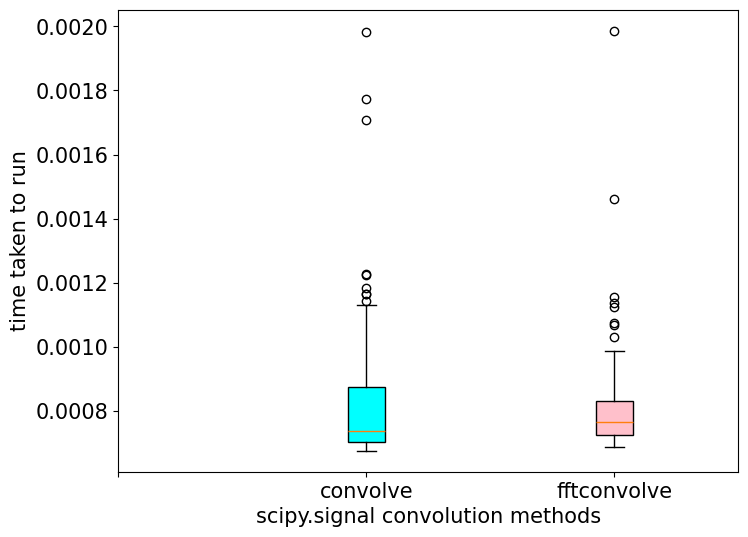

In [19]:
data = [times1, times2]
pylab.figure(figsize=(8,6))
box = pylab.boxplot(data, patch_artist=True) #notch=True,
colors = ['cyan', 'pink']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
pylab.xticks(np.arange(3), ('', 'convolve', 'fftconvolve'), size=15)
pylab.yticks(fontsize=15)
pylab.xlabel('scipy.signal convolution methods', size=15)
pylab.ylabel('time taken to run', size = 15)
pylab.show()